Support Vector Machines for Classification

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [19]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv')
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


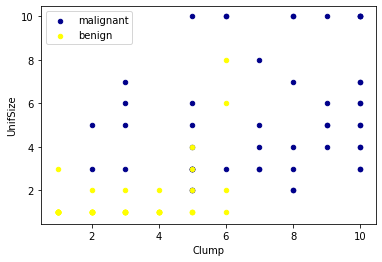

In [17]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [29]:
# Cleaning
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype(int)

In [33]:
# Feature and label extraction
x_data = np.asanyarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
y_data = np.asanyarray(df['Class'])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data) # Default split 3:1
print('Training Set:', x_train.shape, y_train.shape)
print('Testing Set:', x_test.shape, y_test.shape)

Training Set: (512, 9) (512,)
Testing Set: (171, 9) (171,)


## RBF SVM

In [39]:
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(x_train, y_train)
y_hat = model.predict(x_test)

In [53]:
from sklearn import metrics
print('Jaccard Score: %.3f' % metrics.jaccard_similarity_score(y_test, y_hat))
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_hat), '\n')
print('Classification Report: \n', metrics.classification_report(y_test, y_hat))

Jaccard Score: 0.977
Confusion Matrix: 
 [[101   2]
 [  2  66]] 

Classification Report: 
               precision    recall  f1-score   support

           2       0.98      0.98      0.98       103
           4       0.97      0.97      0.97        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Practice

## Linear SVM

In [48]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)
y_hat = model.predict(x_test)

In [51]:
print('Jaccard Score: %.3f' % metrics.jaccard_score(y_test, y_hat))
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_hat), '\n')
print('Classification Report: \n', metrics.classification_report(y_test, y_hat))

Jaccard Score: 0.977
Confusion Matrix: 
 [[101   2]
 [  2  66]] 

Classification Report: 
               precision    recall  f1-score   support

           2       0.98      0.98      0.98       103
           4       0.97      0.97      0.97        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

